<a href="https://colab.research.google.com/github/FaiazS/AI-driven-Customer-Support-Workflow-App/blob/main/LangGraph_App_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing and loading the required dependencies

!pip install langgraph

from langgraph.graph import Graph

In [2]:
def node_1_function(input):

  x = input["x"]
  y = input["y"]

  return x + y

def node_2_function(input):

  return 2 * input

In [3]:
#Defining the Graph, Nodes and Edges

workflow_graph = Graph()

workflow_graph.add_node("node_1", node_1_function)

workflow_graph.add_node("node_2", node_2_function)

workflow_graph.add_edge("node_1", "node_2")

workflow_graph.set_entry_point("node_1")

workflow_graph.set_finish_point("node_2")

lang_graph_workflow_1 = workflow_graph.compile()

In [4]:
lang_graph_workflow_1.invoke({"x" : 587, "y" : 547})

2268

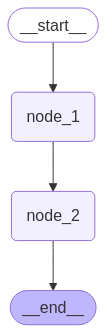

In [5]:
#Displaying or Visualizing the Graph Structured Workflow

from IPython.display import Image, display

try:

  display(Image(lang_graph_workflow_1.get_graph().draw_mermaid_png()))

except:

  pass

In [1]:
#Installing required dependencies

!pip install langchain

!pip install langchain_core

!pip install langchain_groq

!pip install langchain_community

!pip install langgraph

**Customer Query Handling WorkFlow - Customer Support Agent App**

In [19]:
from typing_extensions import TypedDict, Dict

from langgraph.graph import StateGraph, END

from langchain_core.prompts import ChatPromptTemplate

from langchain_core.runnables.graph import MermaidDrawMethod

from IPython.display import display, Image

In [20]:
class State(TypedDict):

  query : str

  category : str

  sentiment : str

  response : str

In [21]:
!pip uninstall -y langchain langchain_core langchain_groq

Found existing installation: langchain 0.3.21
Uninstalling langchain-0.3.21:
  Successfully uninstalled langchain-0.3.21
Found existing installation: langchain-core 0.3.48
Uninstalling langchain-core-0.3.48:
  Successfully uninstalled langchain-core-0.3.48
Found existing installation: langchain-groq 0.3.1
Uninstalling langchain-groq-0.3.1:
  Successfully uninstalled langchain-groq-0.3.1


In [22]:
!pip install --upgrade langchain langchain_core langchain_groq

  Using cached langchain-0.3.21-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_core-0.3.48-py3-none-any.whl.metadata (5.9 kB)
  Using cached langchain_groq-0.3.1-py3-none-any.whl.metadata (2.6 kB)
Using cached langchain-0.3.21-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.3.48-py3-none-any.whl (418 kB)
Using cached langchain_groq-0.3.1-py3-none-any.whl (15 kB)


In [5]:
from google.colab import userdata

import os

from langchain_groq import ChatGroq

from getpass import getpass

os.environ["GROQ_API_KEY"] = getpass('LLMProjectKey1')

from langchain.chat_models import init_chat_model

llm_model = ChatGroq(model_name = "llama-3.3-70b-versatile", groq_api_key = os.environ["GROQ_API_KEY"])

LLMProjectKey1··········


In [23]:
llm_response = llm_model.invoke("What is LangChain and what is LangGraph?")

print(llm_response.content)

LangChain and LangGraph are related concepts in the field of natural language processing (NLP) and artificial intelligence (AI), particularly in the context of large language models (LLMs) like those developed by Meta AI, Google, and other organizations.

**LangChain:**
LangChain is an open-source framework designed to simplify the development and deployment of applications that utilize large language models. It provides a set of tools and APIs that allow developers to build, test, and deploy LLM-based applications more efficiently. LangChain aims to make it easier for developers to integrate LLMs into their projects, enabling them to focus on building innovative applications rather than worrying about the underlying infrastructure.

LangChain offers a range of features, including:

1. Model serving: LangChain provides a simple way to serve and manage LLMs, allowing developers to focus on application development rather than model deployment.
2. API gateway: LangChain includes an API ga

In [27]:
customer_query_workflow = StateGraph(State)

In [24]:
def categorize_customer_query(state : State) -> State:

  prompt = ChatPromptTemplate.from_template(

      "Categorize Customer Queries into the following categories " "Technical, Billing, General. Query : {query}"

      )

  category_flow_chain = prompt | llm_model

  category = category_flow_chain.invoke({"query" : state["query"]}).content

  print(f"\n Catgeory : {category}")

  return {**state, "category" : category}


def analyze_sentiment_of_customer_query(state : State) -> State:

  print("\n Analyzing the sentiment : ")

  prompt = ChatPromptTemplate.from_template(

                                             "Analyze the sentiment of the following customer query and answer in one word"

                                             "Respond with either 'Positive', 'Neutral' or 'Negative'. Query : {query}"

  )

  sentiment_flow_chain = prompt | llm_model

  sentiment = sentiment_flow_chain.invoke({"query" : state["query"]}).content

  print(f"/nSentiment : {sentiment}")

  return {**state, "sentiment" : sentiment}


def handle_technical_customer_query(state: State) -> State:

  print("\n Handling Technical Query : ")

  prompt = ChatPromptTemplate.from_template(

                                            "Provide technical assistance to the following customer query {query}"
  )

  technical_support_flow_chain = prompt | llm_model

  technical_response = technical_support_flow_chain.invoke({"query" : state["query"]}).content

  print(f"\n Technical response : {technical_response}")

  return{**state, "Technical response" : technical_response}


def handle_billing_customer_query(state : State) -> State:

  print("\n Handling Billing Query : ")

  prompt = ChatPromptTemplate.from_template(

                                            "Provide billing assistance to the following customer query {query}."
  )

  billing_flow_chain = prompt | llm_model

  billing_response = billing_flow_chain.invoke({"query" : state["query"]}).content

  print(f"\n Billing response : {billing_response}")

  return {**state, "Billing response " :  billing_response}


def handle_general_customer_query(state : State) -> State:

  print("\n Handling General Query : ")

  prompt = ChatPromptTemplate.from_template(

                                            "Provide general assistance to the following general query {query} of customer."

  )

  general_query_flow_chain = prompt | llm_model

  general_query_response = general_query_flow_chain.invoke({"query" : state["query"]}).content

  print(f"\n General query response : {general_query_response}")

  return{**state, "General query respnse " : general_query_response}


def escalate_customer_query(state: State) -> State:

  print(f"\n Escalating customer query")

  return {"response" : "This customer query has been escalated to a human support specialist due to its negative sentiment"}

def route_customer_query(state: State) -> State:

  if "negative" in state.get("sentiment").lower():

    return "node_6_escalate_customer_query"

  elif state.get("category") == "Technical":

    return "node_3_handle_technical_customer_query"

  elif state.get("category") == "Billing":

    return "node_4_handle_billing_customer_query"

  else:

    return "node_5_handle_general_customer_query"

In [9]:
#Defining the structure of the Graph

if "node_1_categorize_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_1_categorize_customer_query", categorize_customer_query)

if "node_2_analyze_sentiment_of_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_2_analyze_sentiment_of_customer_query", analyze_sentiment_of_customer_query)

if "node_3_handle_technical_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_3_handle_technical_customer_query", handle_technical_customer_query)

if "node_4_handle_billing_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_4_handle_billing_customer_query", handle_billing_customer_query)

if "node_5_handle_general_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_5_handle_general_customer_query", handle_general_customer_query)

if "node_6_escalate_customer_query" not in customer_query_workflow.nodes:

  customer_query_workflow.add_node("node_6_escalate_customer_query", escalate_customer_query)

if "node_2_analyze_sentiment_of_customer_query" not in customer_query_workflow.branches or "route_customer_query" not in customer_query_workflow.branches["node_2_analyze_sentiment_of_customer_query"]:

  customer_query_workflow.add_conditional_edges("node_2_analyze_sentiment_of_customer_query", route_customer_query)

customer_query_workflow.add_edge("node_1_categorize_customer_query", "node_2_analyze_sentiment_of_customer_query")

customer_query_workflow.add_edge("node_3_handle_technical_customer_query", END)

customer_query_workflow.add_edge("node_4_handle_billing_customer_query", END)

customer_query_workflow.add_edge("node_5_handle_general_customer_query", END)

customer_query_workflow.add_edge("node_6_escalate_customer_query", END)

customer_query_workflow.set_entry_point("node_1_categorize_customer_query")

customer_support_app = customer_query_workflow.compile()

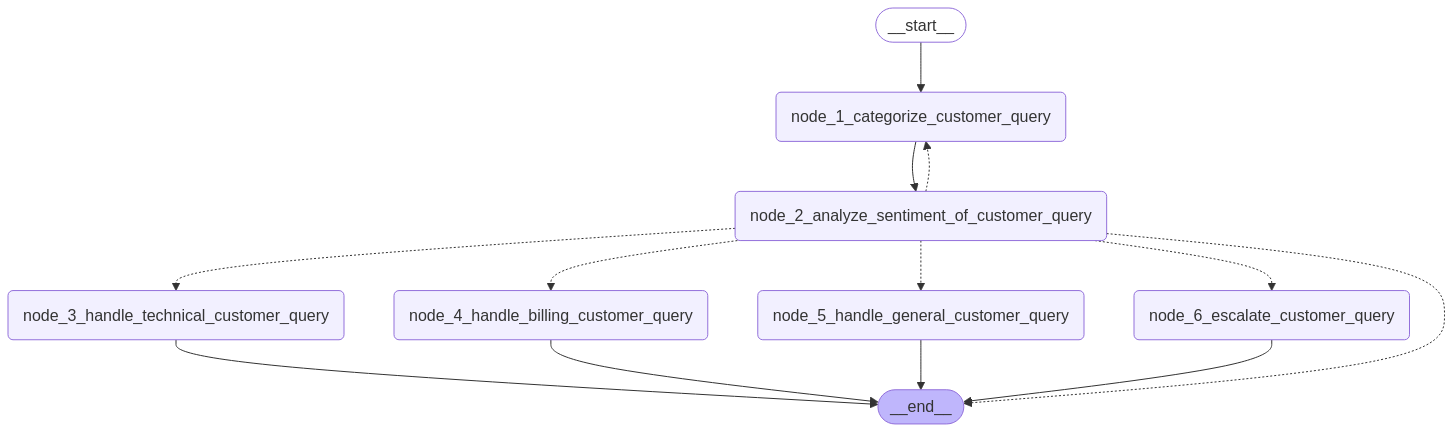

In [10]:
#Displaying the defined graph based workflow

from IPython.display import Image, display

try:

  display(Image(customer_support_app.get_graph().draw_mermaid_png()))

except Exception:

  pass

In [11]:
def run_customer_support_workflow(query : str) -> Dict[str, str]:

  issue_resolution = customer_support_app.invoke({"query": query})

  response = issue_resolution.get('response', 'No specific response generated')

  return {

          "category" : issue_resolution['category'],

          "sentiment" : issue_resolution['sentiment'],

          "response"  : response
  }

In [15]:
#Testing the customer query handling workflow

customer_query = "The total price mentioned in my invoice is incorrect"

issue_resolution = run_customer_support_workflow(customer_query)

print(f"Customer Query : {customer_query}")

print(f"Category : {issue_resolution['category']}")

print(f"Sentiment : {issue_resolution['sentiment']}")

print(f"Response : {issue_resolution['response']}")


 Catgeory : The query "The total price mentioned in my invoice is incorrect" would fall under the category of "Billing".

 Analyzing the sentiment : 
/nSentiment : Negative.

 Escalating customer query
Customer Query : The total price mentioned in my invoice is incorrect
Category : The query "The total price mentioned in my invoice is incorrect" would fall under the category of "Billing".
Sentiment : Negative.
Response : This customer query has been escalated to a human support specialist due to its negative sentiment


In [16]:
#Testing the customer query handling workflow

customer_query = "I want to know when the new Android version will be launched."

issue_resolution = run_customer_support_workflow(customer_query)

print(f"Customer Query : {customer_query}")

print(f"Category : {issue_resolution['category']}")

print(f"Sentiment : {issue_resolution['sentiment']}")

print(f"Response : {issue_resolution['response']}")


 Catgeory : The query "I want to know when the new Android version will be launched" can be categorized as **General**. 

This query is not technical in nature as it doesn't involve a specific technical issue, nor is it related to billing. It's a general inquiry about the launch of a new Android version, which falls under general information or product-related queries.

 Analyzing the sentiment : 
/nSentiment : Neutral.

 Handling General Query : 

 General query response : You're excited to know about the latest Android version. Google typically releases a new version of Android every year, around August or September. However, the exact release date has not been officially announced by Google yet.

Here are a few things we know so far:

1. **Android 14**: The next version of Android is expected to be Android 14, which is currently in the beta testing phase. Google has released several beta versions, and the final version is expected to be released later this year.
2. **Release timeli

In [17]:
#Testing the customer query handling workflow

customer_query = "I like the services provided by your bank and I would like open a savings account"

issue_resolution = run_customer_support_workflow(customer_query)

print(f"Customer Query : {customer_query}")

print(f"Category : {issue_resolution['category']}")

print(f"Sentiment : {issue_resolution['sentiment']}")

print(f"Response : {issue_resolution['response']}")


 Catgeory : The customer query "I like the services provided by your bank and I would like to open a savings account" can be categorized as:

**General**

This query is general in nature as it expresses a customer's interest in opening a new account and does not require technical expertise or involve a billing issue. It is an inquiry about a general service offered by the bank.

 Analyzing the sentiment : 
/nSentiment : Positive.

 Handling General Query : 

 General query response : To open a savings account with our bank, you'll need to provide some personal and identification information. Here's a step-by-step guide to help you get started:

**Required Documents:**

1. **Valid Government-issued ID**: Such as a passport, driver's license, or state ID.
2. **Proof of Address**: A utility bill, lease agreement, or any other document that shows your current address.
3. **Social Security Number or Tax ID Number**: This is required for tax purposes and to comply with banking regulations.


In [18]:
#Testing the customer query handling workflow

customer_query = "Your mobile application has so many bugs, and it keeps crashing, please look into the concern and fix it as soon as possible!"

issue_resolution = run_customer_support_workflow(customer_query)

print(f"Customer Query : {customer_query}")

print(f"Category : {issue_resolution['category']}")

print(f"Sentiment : {issue_resolution['sentiment']}")

print(f"Response : {issue_resolution['response']}")


 Catgeory : The customer query can be categorized as: **Technical**

Reason: The query mentions a specific issue with the mobile application, such as bugs and crashing, which falls under technical problems that require attention from the technical support team.

 Analyzing the sentiment : 
/nSentiment : Negative.

 Escalating customer query
Customer Query : Your mobile application has so many bugs, and it keeps crashing, please look into the concern and fix it as soon as possible!
Category : The customer query can be categorized as: **Technical**

Reason: The query mentions a specific issue with the mobile application, such as bugs and crashing, which falls under technical problems that require attention from the technical support team.
Sentiment : Negative.
Response : This customer query has been escalated to a human support specialist due to its negative sentiment
